# Data Analytics Project from Scratch:
_(In this project i've tried to showcase my approach and startegy for selecting and solving a data analytics problem and since this is only for the purpose of recalling and refreshing my data analytics skills that's why i might use lot of comments and key notes throughout the project)_

## Idea Creation:


In this section of the notebook I'll go through the planning and idea creation for this new data analytics project and the next sections of the project will be data collection, data cleaning and EDA.

For data analytics project ideation, I generally have two approaches. <br> <ul>I can either look first at what data is available and then do a project on what I find.</ul>  or<ul> I can start with the problem that I want to solve and then go out and collect or find the relevant data. </ul> <br>
For the first style one can basically go through kaggle data sets or Google data sets and find something that's interesting or trending. One can generally just download these data sets and can skip the data collection phase.<br> <br>The second way of finding a project is finding our own data for a problem that we're interested in is a more interesting approach in general as well as also fascinatig for employers. <br>For the intents and purposes of this project I'd like to go in and collect my own data. I want to come up with my own problem to solve and I also want to scrape my own data.

Let's go through a kind of brainstorming process for data science project. I always prefer doing project that I'm really interested in and which is more informative in learning point of view and in terms of the subject matter or that a potential audience is interested in like a pandemic is going on and I could try and understand that better, but right now I don't really want to do it on the pandemic because i already have done a SQL project on COVID-19 data to recall my SQL skills and now in order to bring diversity in my portfolio i would like to pick a project from some differet domain. 

So I come up with an idea which is relevant to me (as a job seeker) in a way that the data science positions and roles are different across the country and that's generally reflected in salary range too. So maybe I could try and predict the salary of data science positions based on the lets say job title or like some info about the company and geography. I hope That's something that probably shouldn't be too hard to find the relevant data and that would be meaningful because if I could probably build a cool project or a product later on where I plug in that information and it shows up maybe a range of salaries so working on this project may not only enhance my analytics skills but may also help me to negotiate my salary in interviews.<br> So this was my whiteboard chicken scratch fro ideation and I've now got a project idea so in implementing this project idea I next have to figure out what data I want to collect I know that there's probably some salary data and some company data on LinkedIn and Glassdoor so those are probably the places I am gonna look first to try and collect data. So, In my next section I'll look in how to actually scrape that data and I'll try and implement it

## Data Science Skillset and Salary overview:

As I had decided to do a project related to the data science field where I want to look at different skillsets and try to predict the salary of a position based on some of the factors associated with the job. I'll be looking for this data on LinkedIn and glassdoor.com

let's take a quick look at these two websites and see what data is available there so I've pulled up some job descriptions for data science roles as you can see up here on LinkedIn and on Glassdoor

<div style="text-align: left"> glassdoor</div>  | linkedin
- | - 
![alt](glassdoor.gif) | ![alt](linkedin.gif)

So on linkedin It can be seen that some of the information is pretty readily accessible. If we want to see where it's located for some scraping tools we can inspect the page and see that it's located in the span. If we take a look at Glassdoor it seems like they use the similar web architecture like linkedin but they do have some estimated salary data which is what we're going for. <br>Its very important to know that it's generally not a great practice to do predictions or use a dependent variable that is already an estimate but right now this is probably gonna be the best we can get here.<br> So right now let's try and  make our own Glassdoor prediction engine using some of the information that we have here. Let's go through and figure out how we're gonna scrape some of this data.

## Web Scraping

<b>There are generally two approaches to scraping data online.</b> <ul>One can either go through and use beautiful soup which takes all of the HTML on a page and organizes it and lets you pull some of the elements</ul> <ul>or</ul> <ul>One can use selenium which is basically a bot that goes through and clicks on elements of the page and copies them into a data frame.<br> As we see both these websites use JavaScript so probably I want to go with the selenium approach. At first I'm gonna Google glassdoor scraper if someone has already written a selenium code for scraping glassdoor data then my job will be a lot more easier.<br> Here I find a glassdoor scraper in selenium that you can do in 10 minutes by [Homer sakuya](https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905) and this looks like a lot of the data that I really want right here and as we know there's no problem in data science when we use someone else's code we just want to make sure that they're credited for their work. Usually one can fork their code on github but i'll be copying the python code and will be adding the original link on top of the code as its more convenient for me. 

I have downloaded the file and renamed it as glassdoor_scraper.py 

In [1]:
"""

original author: Kenarapfaik
url: https://github.com/arapfaik/scraping-glassdoor-selenium
"""
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import pandas as pd
import glassdoor_scraper as gs
path = 'C:/Users/toqee/chromdriver'
df1 = gs.get_jobs('datascientist', 2, False, path, 2)
df1.to_csv('glassdoor_jobs.csv')

Now that I have got this code in my notebook, There are some necessary changes such as checking the correct version of chrome driver and the path inside the code. Also I have to adjust the sleep time according to my own internet speed otherwise the browser will close too early and scraped data could be empty. This code already included "bypassing login screen" option as well as "accept cookies" options which made my work a lot more easier.

So with the help of glassdoor_scraper by Kenarapfaik i was able to scrape 1000 job postings from glassdoor.com. With each job, I got the following:

<ul><b>Job title <br>
Salary Estimate <br>
Job Description<br>
Rating<br>
Company<br>
Location<br>
Company Headquarters<br>
Company Size<br>
Company Founded Date<br>
Type of Ownership<br>
Industry<br>
Sector<br>
Revenue<br>
Competitors<br> </ul>

## Data Cleaning

In [2]:
df=pd.read_csv('glassdoor_jobs.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Here we go, this is the data that was obtained and it can be seen that there's a lot of cleaning required to process this data for EDA. Let's take a look at head and tail of the data and point out what kind of cleaning can be done to make this data more meaningful.

<ul><b>
Removing null values and rows without salary<br>
    Parsing numeric data out of salary<br>
    Making an employer column and providing salary and hourly wages<br>
    Parsing rating out of company column<br>
    Making a new column for company state<br>
    Adding a column for if the job was at the company’s headquarters<br>
    Transforming the founded date into age of company<br>
    Making columns for if different skills were listed in the job description like Python, R, Excel, AWS, Spark<br>
    Making Column for simplified job title and Seniority<br>
    Creating Column for description length<br></b>

### Parsing Salary

In [3]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2

### Company Name text Only

In [4]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

### State field 

In [5]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.job_state.value_counts()
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

### age of company 


In [6]:
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)


### Parsing of job description (python, etc.)


In [7]:
#python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df.R_yn.value_counts()

#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()

#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()

#excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()

1    388
0    354
Name: excel, dtype: int64

In [8]:
df.columns

df_out = df.drop(['Unnamed: 0'], axis =1)

df_out.to_csv('salary_data_cleaned.csv',index = False)

df_out.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


So this is the cleaned data which is ready for EDA and model building

## Exploratory Data Analysis

EDA is the step where we really start understanding our data and where we start analyzing trends and begin to find insights. First, I'll be doing some additional data cleaning. I'll clean up the job titles, and do some feature engineering. Next, I'll look at histograms and box plots of the continuous data fields. This step is important if we want normal data to do a regression analysis during model building. Then I'll look at the categorical data. I want to see what companies, states, industries, and sectors these jobs are offered in. After that, I'll make some pivot tables to better understand how average salary is different across our categorical categories. Finally, I'll make a word cloud to visualize some of the most common words found in the descriptions. 

In [9]:
import matplotlib.pyplot as plt #matplotlib and seaborn was not imported yet
import seaborn as sns

In [10]:
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [11]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [12]:
df_out['job_simp'] = df_out['Job Title'].apply(title_simplifier)

In [13]:
df_out.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [14]:
df_out['seniority'] = df_out['Job Title'].apply(seniority)
df_out.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [15]:
# Fix state Los Angeles 
df_out['job_state']= df_out.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df_out.job_state.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
UT     10
IN     10
MO      9
AZ      9
AL      8
MI      6
DE      6
GA      6
KY      6
IA      5
CT      5
NE      4
LA      4
OR      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [16]:
#  Job description length 
df_out['desc_len'] = df_out['Job Description'].apply(lambda x: len(x))
df_out['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: desc_len, Length: 742, dtype: int64

In [17]:
#Competitor count
df_out['num_comp'] = df_out['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [18]:
df_out['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [19]:
#hourly wage to annual 

df_out['min_salary'] = df_out.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df_out['max_salary'] = df_out.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [20]:
df_out[df_out.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [21]:
df_out.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


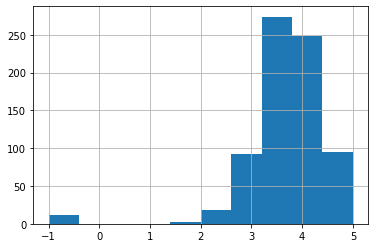

In [22]:
df_out.Rating.hist()

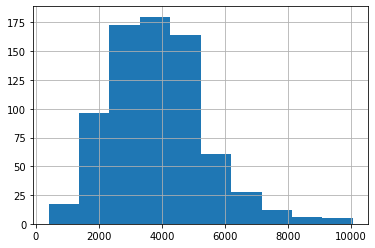

In [23]:
df_out.desc_len.hist()

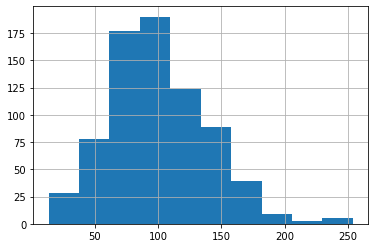

In [24]:
df_out.avg_salary.hist()

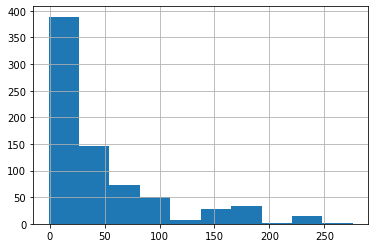

In [25]:
df_out.age.hist()

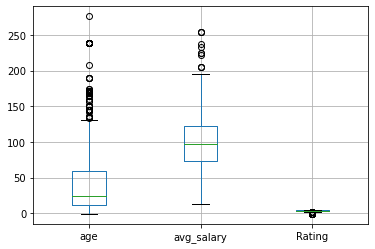

In [26]:
df_out.boxplot(column = ['age','avg_salary','Rating'])

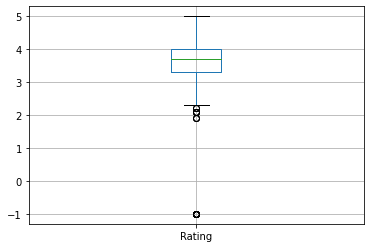

In [27]:
df_out.boxplot(column = 'Rating')

In [28]:
df_out[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


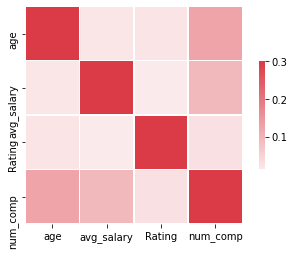

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_out[['age','avg_salary','Rating','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
df_out.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [31]:
pd.pivot_table(df_out, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [32]:
pd.pivot_table(df_out, index = ['job_simp','seniority'], values = 'avg_salary')


avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [33]:
pd.pivot_table(df_out, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [35]:
pd.pivot_table(df_out, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [36]:
pd.pivot_table(df_out[df_out.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [38]:
#nltk.download()

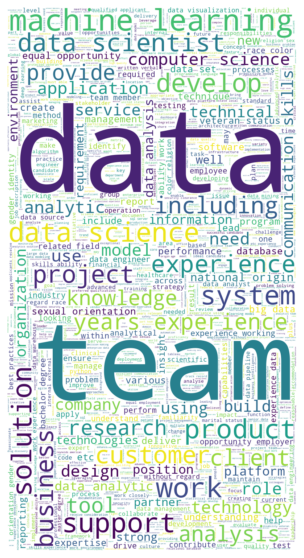

In [39]:
words = " ".join(df_out['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

## Acknowledgments

* [Ken Jee](https://www.youtube.com/channel/UCiT9RITQ9PW6BhXK0y2jaeg) - Data Science Tutorial and Projects.
* [Kaggle](https://www.kaggle.com/) - Courses.
* [Glassdoor](https://www.glassdoor.co.uk/index.htm) - Job data.
* [DS tools](https://data-flair.training/blogs/data-science-tools/) - Essential Data Science Ingredients